# ADS Assignment 3

Problem Statement: House Price Prediction

Description:- 

House price prediction is a common problem in the real estate industry and
involves predicting the selling price of a house based on various features and attributes. The
problem is typically approached as a regression problem, where the target variable is the price
of the house, and the features are various attributes of the house
The features used in house price prediction can include both quantitative and categorical
variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to
main road, and various amenities such as a garage and other factors that may influence the
value of the property.
Accurate predictions can help agents and appraisers price homes correctly, while
homeowners can use the predictions to set a reasonable asking price for their properties.
Accurate house price prediction can also be useful for buyers who are looking to make
informed decisions about purchasing a property and obtaining a fair price for their
investment.

## Attribute Information:

## 1. Download the dataset: titanic.csv
## 2. Load the dataset.

In [1]:
# Loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [3]:
df.shape

(545, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


## 3. Perform Below Visualizations.
## ● Univariate Analysis


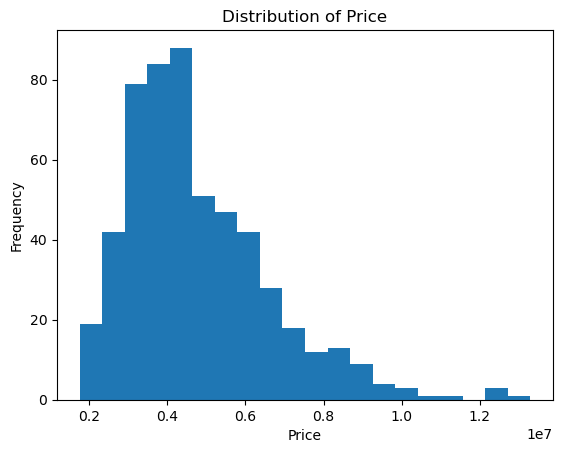

In [5]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()


## ● Bi - Variate Analysis

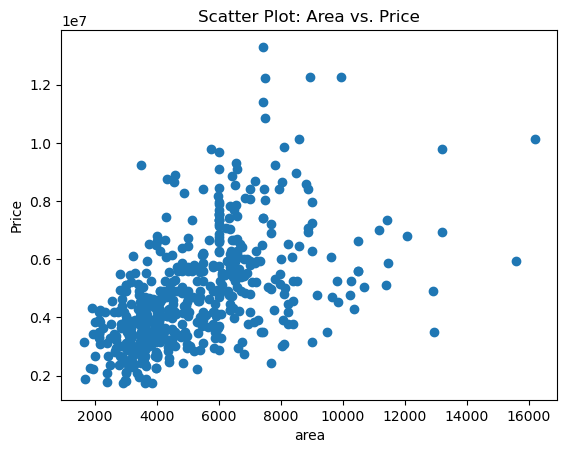

In [6]:
plt.scatter(df['area'], df['price'])
plt.xlabel('area')
plt.ylabel('Price')
plt.title('Scatter Plot: Area vs. Price')
plt.show()



## ● Multi - Variate Analysis

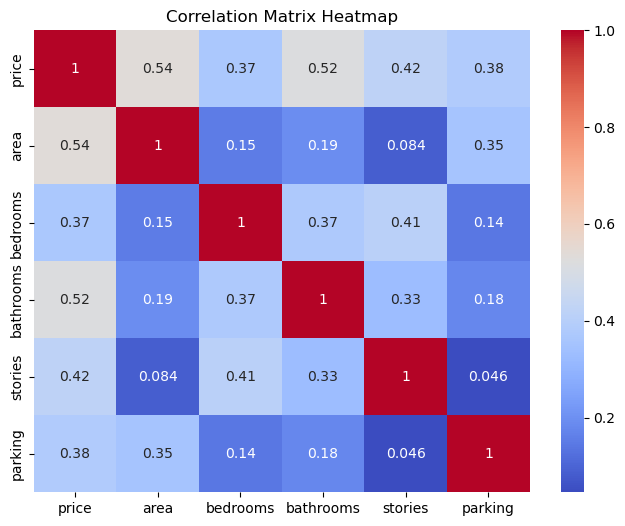

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## 4. Perform descriptive statistics on the dataset.

In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 5. Handle the Missing values.

In [9]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## 6. Find the outliers and replace the outliers

In [11]:
# numeric columns
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms','stories','parking']

# Calculate the IQR for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the median value
for col in numeric_cols:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = df[col].median()

# Verify if outliers have been replaced
outliers_replaced = df[(df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)].any()
print(outliers_replaced)


price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool


## 7. Check for Categorical columns

In [12]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)
df.head()

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,4340000,8960,4,1,2,yes,no,no,no,yes,0,furnished
2,4340000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,4340000,7500,4,2,2,yes,no,yes,no,yes,0,furnished
4,4340000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## 8. Split the data into dependent and independent variables.

In [13]:
x = df.iloc[:,:11] # Independent variables
y = df.iloc[:,11]  # Dependent variable

# Display the independent variables (features)
print("Independent values:\n",x.head())

# Display the dependent variable (target)
print("\nDependent variable:\n",y.head())

Independent values:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  4340000  7420         4          2        3      yes        no       no   
1  4340000  8960         4          1        2      yes        no       no   
2  4340000  9960         3          2        2      yes        no      yes   
3  4340000  7500         4          2        2      yes        no      yes   
4  4340000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking  
0              no             yes        2  
1              no             yes        0  
2              no              no        2  
3              no             yes        0  
4              no             yes        2  

Dependent variable:
 0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
Name: furnishingstatus, dtype: object


## perform encoding.

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
ct=ColumnTransformer([('oh',OneHotEncoder(),[5,6,7,8,9])],remainder='passthrough')

In [16]:
x=ct.fit_transform(x)

In [17]:
x.shape

(545, 16)

In [18]:
x

array([[0., 1., 1., ..., 2., 3., 2.],
       [0., 1., 1., ..., 1., 2., 0.],
       [0., 1., 1., ..., 2., 2., 2.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 2., 0.]])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
y=le.fit_transform(y)

In [22]:
y

array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,

## 9. Scale the independent variables

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
x=sc.fit_transform(x)

# Display the scaled independent variables
print(x)

[[-0.40562287  0.40562287  0.46531479 ...  1.47243614  2.2138449
   1.72906501]
 [-0.40562287  0.40562287  0.46531479 ... -0.57470084  0.56780742
  -0.79056181]
 [-0.40562287  0.40562287  0.46531479 ...  1.47243614  0.56780742
   1.72906501]
 ...
 [-0.40562287  0.40562287  0.46531479 ... -0.57470084 -1.07823005
  -0.79056181]
 [ 2.46534421 -2.46534421  0.46531479 ... -0.57470084 -1.07823005
  -0.79056181]
 [-0.40562287  0.40562287  0.46531479 ... -0.57470084  0.56780742
  -0.79056181]]


## 10. Split the data into training and testing 

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
x_train

array([[-0.40562287,  0.40562287,  0.46531479, ...,  1.47243614,
         0.56780742,  0.4692516 ],
       [-0.40562287,  0.40562287,  0.46531479, ...,  1.47243614,
        -1.07823005, -0.79056181],
       [-0.40562287,  0.40562287,  0.46531479, ..., -0.57470084,
        -1.07823005,  1.72906501],
       ...,
       [-0.40562287,  0.40562287,  0.46531479, ...,  1.47243614,
         2.2138449 ,  0.4692516 ],
       [-0.40562287,  0.40562287,  0.46531479, ..., -0.57470084,
        -1.07823005, -0.79056181],
       [-0.40562287,  0.40562287, -2.14908276, ...,  1.47243614,
         0.56780742,  0.4692516 ]])

In [27]:
y_train

array([0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1,
       1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 2,
       0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0,
       2, 0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1,

In [28]:
y_train.shape

(436,)

In [29]:
x_test

array([[ 2.46534421, -2.46534421,  0.46531479, ...,  1.47243614,
         0.56780742,  0.4692516 ],
       [-0.40562287,  0.40562287,  0.46531479, ...,  1.47243614,
         2.2138449 , -0.79056181],
       [-0.40562287,  0.40562287,  0.46531479, ..., -0.57470084,
        -1.07823005, -0.79056181],
       ...,
       [-0.40562287,  0.40562287,  0.46531479, ...,  1.47243614,
         0.56780742,  0.4692516 ],
       [-0.40562287,  0.40562287, -2.14908276, ...,  1.47243614,
         0.56780742,  0.4692516 ],
       [-0.40562287,  0.40562287,  0.46531479, ...,  1.47243614,
        -1.07823005,  1.72906501]])

In [30]:
x_test.shape

(109, 16)

In [31]:
y_test

array([2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [32]:
y_test.shape

(109,)

## Building a Regression Model

## 11. Build the Model

In [33]:
from sklearn.svm import SVC

In [34]:
model=SVC(kernel='rbf')

In [35]:
model

SVC()

## 12. Train the Model

In [36]:
# training the model
fit=model.fit(x_train,y_train)

## 13. Test the Model

In [37]:
# test the model
pred=fit.predict(x_test)

In [38]:
pred

array([1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1])

In [39]:
y_test

array([2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

## 14. Measure the performance using Metrics.

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("confusion matrix:\n",confusion_matrix(y_test,pred))
print("accuracy:",accuracy_score(y_test,pred))

confusion matrix:
 [[ 8 15  6]
 [ 3 30  6]
 [ 5 22 14]]
accuracy: 0.47706422018348627
